In [ ]:
Filter Methods
- Basic/Univariate
    1. Constant or Quasi Constant Features - VarianceThreshold
Multivariate
    1. Remove Duplicate
    2. Corr()
    3. Chi2

In [1]:
from sklearn.feature_selection import VarianceThreshold

In [2]:
import pandas as pd
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A'] = le.fit_transform(df[['A']])
df

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,A,B,C
0,1,1,1
1,0,2,2
2,1,3,3
3,1,1,1
4,1,2,2
5,1,1,1
6,1,1,1
7,1,1,1


In [13]:
vt = VarianceThreshold(threshold=0.2)
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [14]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

Removing Duplicate Features

In [22]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1],
              'D':[1,2,3,1,2,1,1,1],
              'E':[9,2,3,1,2,1,1,9],'F':[9,2,3,1,2,1,1,9],'G':[9,2,3,1,2,1,1,9]})

In [23]:
df_T = df.T 
df_T

,0,1,2,3,4,5,6,7
A,m,f,m,m,m,m,m,m
B,1,2,3,1,2,1,1,1
C,1,2,3,1,2,1,1,1
D,1,2,3,1,2,1,1,1
E,9,2,3,1,2,1,1,9
F,9,2,3,1,2,1,1,9
G,9,2,3,1,2,1,1,9


In [24]:
df_T.duplicated()

A    False
B    False
C     True
D     True
E    False
F     True
G     True
dtype: bool

In [25]:
df_T.duplicated().sum()

4

In [27]:
df_T.drop_duplicates()

,0,1,2,3,4,5,6,7
A,m,f,m,m,m,m,m,m
B,1,2,3,1,2,1,1,1
E,9,2,3,1,2,1,1,9


In [28]:
df_T.drop_duplicates(keep='first') #by default,keep first

,0,1,2,3,4,5,6,7
A,m,f,m,m,m,m,m,m
B,1,2,3,1,2,1,1,1
E,9,2,3,1,2,1,1,9


In [30]:
df_T.drop_duplicates(keep='last')

,0,1,2,3,4,5,6,7
A,m,f,m,m,m,m,m,m
D,1,2,3,1,2,1,1,1
G,9,2,3,1,2,1,1,9


Correlation Filter

    Correlation is measured as linear relationship between two quantitive columns. It tell's how one variable depends on other.
    Say, we have 3 features A,B,C & one target T. To find out important features for model predicting T, we need to measure correlation between A & T, B & T, C & T.
    If we see feature A & B are correlated, what to do ?
    A. A & B feature provide redundent information to model for predicting T, thus one of them should be removed.

Three ways of calculating correlation - Pearson, Spearman, Kendall


In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')

In [33]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [35]:
corr = df.corr(method='pearson')

In [43]:
abs(corr['fixed acidity']).sort_values(ascending=False)[:6]

fixed acidity    1.000000
pH               0.425858
citric acid      0.289181
density          0.265331
alcohol          0.120881
quality          0.113663
Name: fixed acidity, dtype: float64

In [62]:
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j])>0.8:
            corr_cols = corr.columns[i]
            print(corr.iloc[i,j])
            print(corr_cols,"and",corr.columns[j])

0.8389664549045891
density and residual sugar


In [63]:
df.drop(labels=corr_cols,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   pH                    4898 non-null   float64
 8   sulphates             4898 non-null   float64
 9   alcohol               4898 non-null   float64
 10  quality               4898 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 421.0 KB


Chi-squared Method

    Used for testing relationship between categorical variables (binary targets/ counts etc.)
    This calculates relationship betwen all features & target (both categorical)

In [64]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [65]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
cat_adult_data = adult_data.select_dtypes(include=['object'])

In [67]:
cat_adult_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [68]:
from sklearn.preprocessing import OrdinalEncoder

In [69]:
oe = OrdinalEncoder()

In [70]:
data_tf = oe.fit_transform(cat_adult_data)

In [72]:
df = pd.DataFrame(data_tf, columns=list(cat_adult_data.columns.values))

In [74]:
from sklearn.feature_selection import chi2,SelectKBest

In [75]:
chi_2, pval = chi2(df.drop(columns=['Salary']), df.Salary)

In [76]:
chi_2

array([  47.50811916,  297.94227041, 1123.46981798,  504.5588538 ,
       3659.14312486,   33.03130514,  502.43941948,   13.61925602])

In [85]:
feature_importance = pd.Series(chi_2,index = list(df.drop(columns=['Salary']).columns.values))

In [89]:
feature_importance.sort_values(ascending=False)

relationship      3659.143125
marital-status    1123.469818
occupation         504.558854
sex                502.439419
education          297.942270
workclass           47.508119
race                33.031305
native-country      13.619256
dtype: float64

In [79]:
import numpy as np

In [81]:
pval

array([5.47766026e-012, 9.24882165e-067, 2.61759457e-246, 9.68421957e-112,
       0.00000000e+000, 9.06868555e-009, 2.80029903e-111, 2.23877386e-004])

In [91]:
fs = SelectKBest(k=4,score_func=chi2)

In [92]:
fs.fit_transform(df.drop(columns=['Salary']), df.Salary)

array([[4., 1., 1., 1.],
       [2., 4., 0., 1.],
       [0., 6., 1., 1.],
       ...,
       [6., 1., 4., 0.],
       [4., 1., 3., 1.],
       [2., 4., 5., 0.]])

In [96]:
fs.scores_

array([  47.50811916,  297.94227041, 1123.46981798,  504.5588538 ,
       3659.14312486,   33.03130514,  502.43941948,   13.61925602])

PS: Corr is for finding relationship between continues feature & continues target. Chi2 is for finding relationship between categorical features & categorical target
ANOVA Univariate Test

    Suited if feature is continues & normally distributed.
    Target can be discrete/categorical. f_classif
    Target can also be continues. f_regression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')

In [5]:
from sklearn.feature_selection import SelectKBest,f_classif
fs = SelectKBest(k=4,score_func=f_classif)

In [9]:
feature_data = fs.fit_transform(df.drop(columns=['quality']),df.quality)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainX,testX,trainY,testY =train_test_split(feature_data,df.quality)

In [15]:
lr.fit(trainX,trainY)

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
lr.score(testX,testY)

0.47020408163265304

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()


In [19]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [20]:
dt.score(testX,testY)

0.6016326530612245

In [21]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)

In [25]:
features = list(df.columns.values)
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [26]:
features.remove('quality')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
try_features = []
for feature in features:
    try_features.append(feature)
    dt = DecisionTreeClassifier()
    trainX,testX,trainY,testY =train_test_split(df[try_features],df.quality)
    dt.fit(trainX,trainY)
    print(dt.score(testX,testY))
    

0.7738775510204081
0.7485714285714286
0.7493877551020408
0.7869387755102041
0.8195918367346938
0.7942857142857143
0.7836734693877551
0.8040816326530612
0.8367346938775511
0.8204081632653061
0.8040816326530612


In [29]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [33]:
for k in range(4,10):
    sfs = SequentialFeatureSelector(k_features=k,estimator=DecisionTreeClassifier())
    sfs.fit(trainX,trainY)
    print("k=",k,sfs.k_score_)

k= 4 0.8007025153385605
k= 5 0.81132180392593
k= 6 0.8091519768670411
k= 7 0.8047923038425179
k= 8 0.8058777734527054
k= 9 0.8094192663441397


In [34]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [35]:
efs = ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(),min_features=4,max_features=10,scoring='accuracy')

In [36]:
efs.fit(trainX,trainY)

Features: 1815/1815

ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(), max_features=10,
                          min_features=4)

In [37]:
efs.best_feature_names_

('fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [38]:
efs.best_score_

0.8222117184748561

Tree based- Random Forest


RandomForest

    Base understanding, train empty trees with different subset of data. And, it will generate different trees.
    For doing the prediction (classification), all the participating trees predict. And, majority decides the prediction.
    These composition of trees is known as RandomForest

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits = load_digits()

In [42]:
digits.images[110]

array([[ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.],
       [ 0.,  0., 11., 15.,  3.,  0.,  0.,  0.],
       [ 0.,  7., 15.,  4.,  0.,  0.,  0.,  0.],
       [ 0., 12., 11.,  1.,  3.,  8.,  2.,  0.],
       [ 0.,  4., 12., 15., 15., 16.,  9.,  0.],
       [ 0.,  0.,  0.,  8., 16.,  8.,  2.,  0.],
       [ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.]])

In [43]:
import matplotlib.pyplot as plt

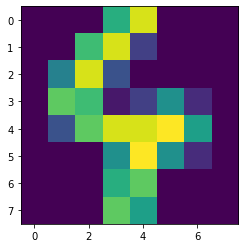

In [44]:
plt.imshow(digits.images[110])

In [45]:
digits.target[110]

4

In [48]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dt = DecisionTreeClassifier()
trainX,testX,trainY,testY = train_test_split(digits.data,digits.target)
dt.fit(trainX,trainY)
dt.score(testX,testY)

0.8777777777777778

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf.fit(trainX,trainY)
rf.score(testX,testY)

0.9822222222222222


Introduction to Hybrid Methods

    Rather than using a single approch to do feature subset select, hybrid methods as the names combine different approaches to get best possible feature subset.
    It's like starting with filter based methods to remove contant of similar data.
    Followed by using wrapper based methods

Advantages

    High accuracy models
    Robust models

Process

    Using Filter & Wrapper methods
        using f_classif choose some important features. (reduces the feature space) 100 - 75
        using SequentialFeatureSelector get top features from the selected ones 75-25

    Using Embedded & Wrapper methods
        Lasso for identifying importnat features or decision tree.
        Choosing top 50% features & applying wrapper methods

A fancy way of naming the above things

    reducing the feature dimension using incremental techniques



In [51]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)

In [53]:
features = list(df.columns.values)
features.remove('quality')

In [55]:
dt = DecisionTreeClassifier()
dt.fit(df[features],df.quality)

DecisionTreeClassifier()